In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [3]:
# Cargar los datos
train_data = pd.read_csv('C:\\Users\\pc_tesoreria1\\Downloads\\mnist_test.csv')
test_data = pd.read_csv('C:\\Users\\pc_tesoreria1\\Downloads\\mnist_train.csv')

In [4]:

# Separar características (X) y etiquetas (y)
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


In [5]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train['sum_row'] = X_train.sum(axis=1)
X_test['sum_row'] = X_test.sum(axis=1)

In [7]:
X_train['sum_row'] = X_train.sum(axis=1)
X_test['sum_row'] = X_test.sum(axis=1)

In [8]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [9]:
y_pred = clf.predict(X_test_scaled)


In [10]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9450333333333333


In [11]:
# Hacer predicciones
y_pred = clf.predict(X_test_scaled)

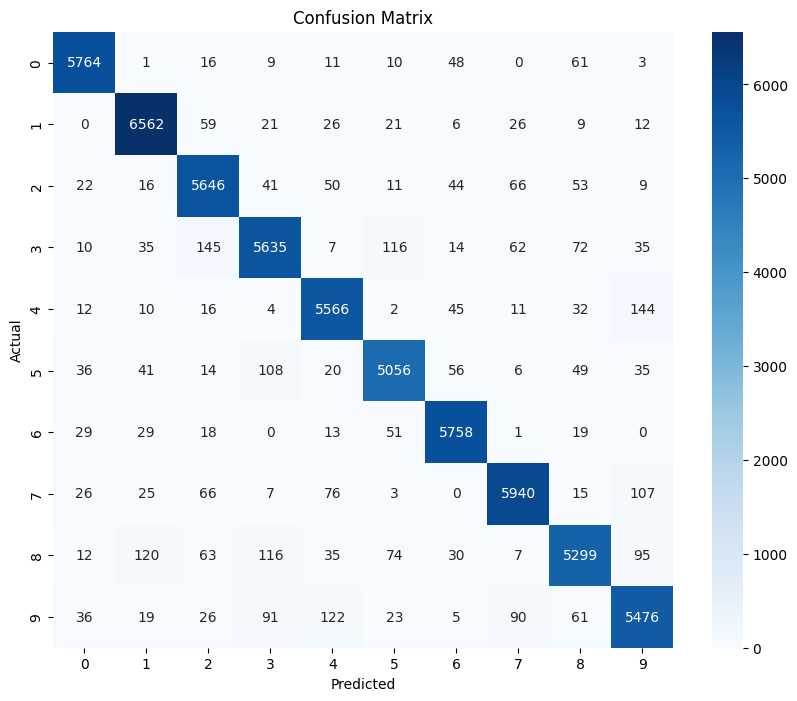

In [12]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Obtener la simetría de la matriz de confusión
symmetry_score = np.sum(conf_matrix == conf_matrix.T) / np.prod(conf_matrix.shape)


In [15]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular la matriz de confusión transpuesta
conf_matrix_transpose = conf_matrix.T

# Calcular la simetría como la proporción de entradas iguales entre la matriz y su transpuesta
symmetry_indicator = np.sum(conf_matrix == conf_matrix_transpose) / np.prod(conf_matrix.shape)

print(f'Symmetry Indicator: {symmetry_indicator:.2f}')

Symmetry Indicator: 0.12


In [17]:
# Calcular la sensibilidad (recall) para cada clase
sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Imprimir la sensibilidad para cada clase
for i in range(len(sensitivity)):
    print(f'Class {i}: Sensitivity = {sensitivity[i]:.2f}')

Class 0: Sensitivity = 0.97
Class 1: Sensitivity = 0.97
Class 2: Sensitivity = 0.95
Class 3: Sensitivity = 0.92
Class 4: Sensitivity = 0.95
Class 5: Sensitivity = 0.93
Class 6: Sensitivity = 0.97
Class 7: Sensitivity = 0.95
Class 8: Sensitivity = 0.91
Class 9: Sensitivity = 0.92


In [18]:
# Calcular la precisión para cada clase
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Imprimir la precisión para cada clase
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.2f}')

Class 0: Precision = 0.97
Class 1: Precision = 0.96
Class 2: Precision = 0.93
Class 3: Precision = 0.93
Class 4: Precision = 0.94
Class 5: Precision = 0.94
Class 6: Precision = 0.96
Class 7: Precision = 0.96
Class 8: Precision = 0.93
Class 9: Precision = 0.93


In [19]:
# Calcular la especificidad para cada clase
specificity = []
for i in range(len(conf_matrix)):
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(np.delete(conf_matrix, i, axis=0)[:, i])
    specificity.append(true_negatives / (true_negatives + false_positives))

# Imprimir la especificidad para cada clase
for i in range(len(specificity)):
    print(f'Class {i}: Specificity = {specificity[i]:.2f}')
    

Class 0: Specificity = 1.00
Class 1: Specificity = 0.99
Class 2: Specificity = 0.99
Class 3: Specificity = 0.99
Class 4: Specificity = 0.99
Class 5: Specificity = 0.99
Class 6: Specificity = 1.00
Class 7: Specificity = 0.99
Class 8: Specificity = 0.99
Class 9: Specificity = 0.99
